In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2)

In [2]:
df = pd.read_csv('data/customers.csv', sep=';')
df = df.drop(columns=['duration', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'contact'])
df['balance_k'] = df.balance / 1000
df['row_id'] = df.reset_index().index
df.head()

,age,job,marital,education,default,balance,housing,loan,y,balance_k,row_id
0,58,management,married,tertiary,no,2143,yes,no,no,2.143,0
1,44,technician,single,secondary,no,29,yes,no,no,0.029,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,no,0.002,2
3,47,blue-collar,married,unknown,no,1506,yes,no,no,1.506,3
4,33,unknown,single,unknown,no,1,no,no,no,0.001,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   y          45211 non-null  object 
 9   balance_k  45211 non-null  float64
 10  row_id     45211 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 3.8+ MB


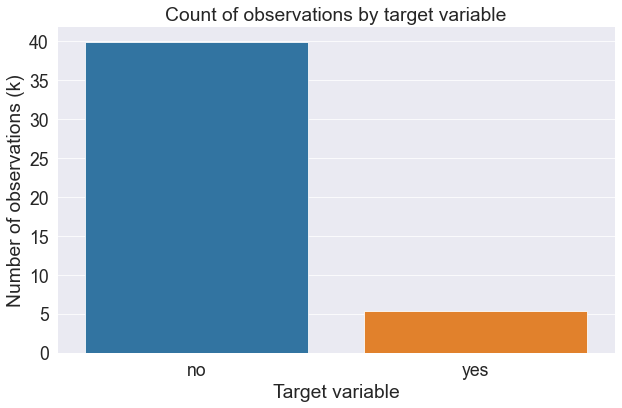

In [4]:
x, y = 'y', 'row_id'

df_target = df[[x, y]].groupby(
    x, 
    as_index=False).count()

df_target.row_id = df_target.row_id / 1000

plt.figure(figsize=(10, 6))
sns.barplot(
    x=x, 
    y=y, 
    data=df_target
).set(
    title='Count of observations by target variable', 
    xlabel='Target variable', 
    ylabel='Number of observations (k)');

We do have a slight imbalance ratio of 1:8 in the data. This is not an extreme cause for concern but we could consider balancing the data and seeing if it improves our model.

Due to not having millions of rows to work with we could consider <b>random over-sampling</b> however we will need to be mindful that this could cause overfitting on the test data.

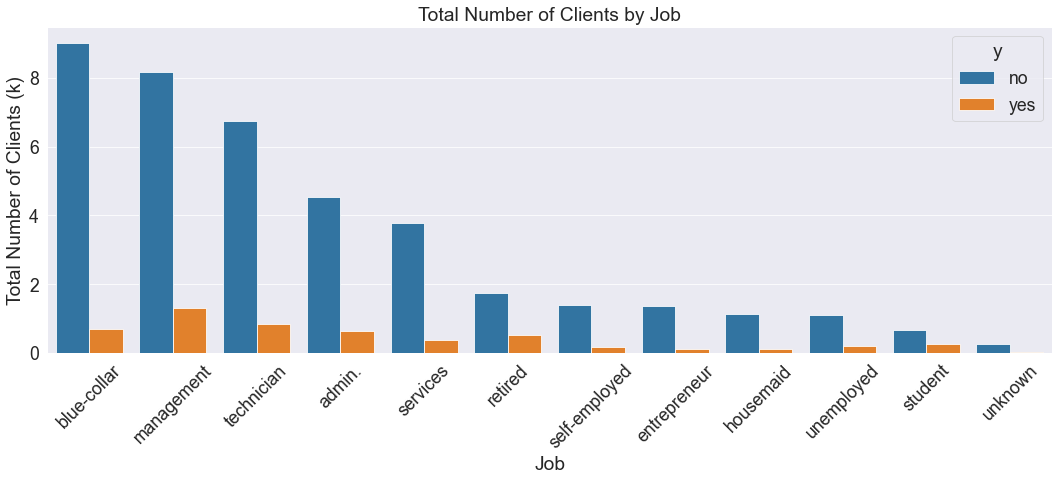

In [5]:
x, y, z = 'job', 'y', 'row_id'

df_job = df[[x, y, z]].groupby(
    by=[x, y], 
    as_index=False
).count().sort_values(
    by=[z],
    ascending=False
)

df_job[z] = df_job[z] / 1000

plt.figure(figsize=(18, 6))
plt.xticks(rotation=45)
sns.barplot(
    x=x,
    y=z, 
    data=df_job,
    hue=y
).set(
    title='Total Number of Clients by Job', 
    xlabel='Job', 
    ylabel='Total Number of Clients (k)');

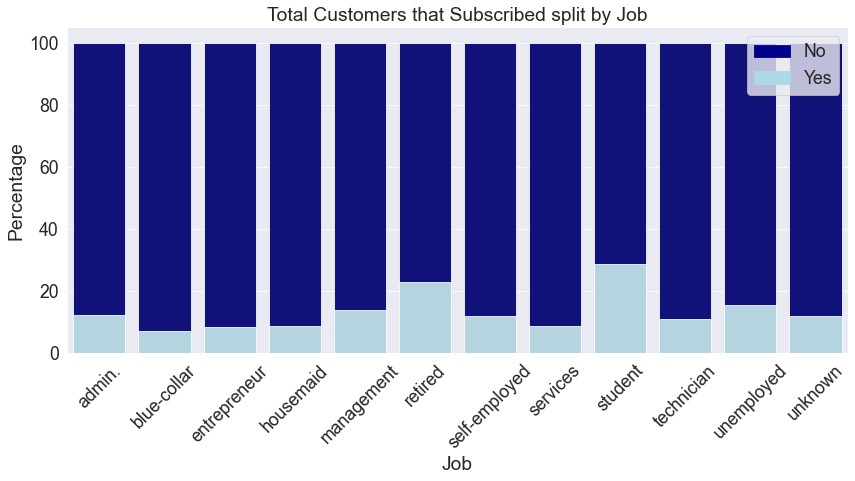

In [6]:
x, y = 'job', 'row_id'

total = df.groupby(x)[y].count().reset_index()
part = df[df.y=='yes'].groupby(x)[y].count().reset_index()

part.row_id = [i / j * 100 for i, j in zip(part.row_id, total.row_id)]
total.row_id = [i / j * 100 for i, j in zip(total.row_id, total.row_id)]

plt.figure(figsize=(14, 6))

bar_total = sns.barplot(x=x,  y=y, data=total, color='darkblue')
bar_part = sns.barplot(x=x, y=y, data=part, color='lightblue')

top_bar = mpatches.Patch(color='darkblue', label='No')
bottom_bar = mpatches.Patch(color='lightblue', label='Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.xticks(rotation=45)
plt.xlabel('Job')
plt.ylabel('Percentage')
plt.title('Total Customers that Subscribed split by Job')

plt.show()

We can see that blue collar, management and technician make up the majority of our client base and at a first glance we could hypothesis that clients in these job roles are more likely to subscribe to a deposit campaign however, when we view the stacked chart, we can see that in terms of the proportion, retired clients and students actually have a higher conversion rate.

This is interesting because we assumed in our numerical analysis that as clients over 60 had a balance of less than 10k, we assumed that they would be less inclined to commit their money to a long term deposit but actually, this may not be the case.

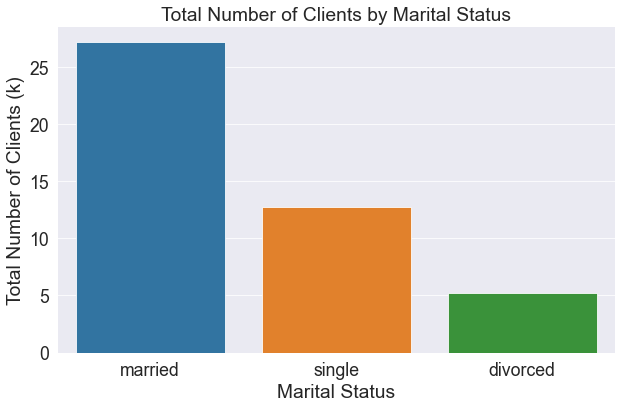

In [7]:
x, y = 'marital', 'row_id'

df_job = df[[x, y]].groupby(
    by=[x], 
    as_index=False
).count().sort_values(
    by=[y],
    ascending=False
)

df_job[y] = df_job[y] / 1000

plt.figure(figsize=(10, 6))
sns.barplot(
    x=x,
    y=y, 
    data=df_job
).set(
    title='Total Number of Clients by Marital Status', 
    xlabel='Marital Status', 
    ylabel='Total Number of Clients (k)');

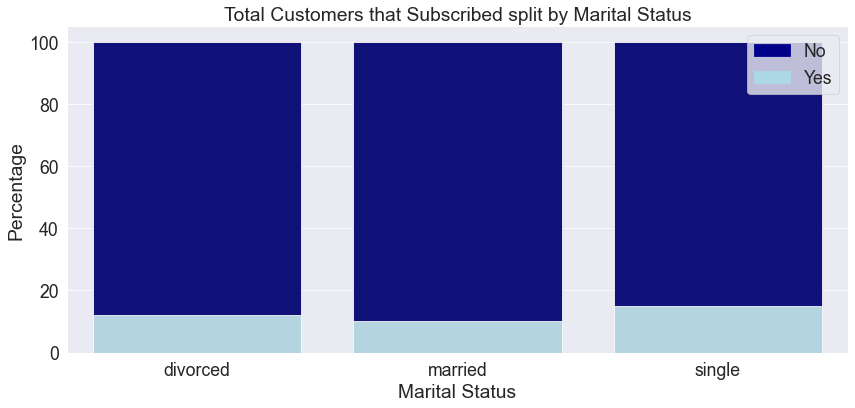

In [8]:
x, y = 'marital', 'row_id'

total = df.groupby(x)[y].count().reset_index()
part = df[df.y=='yes'].groupby(x)[y].count().reset_index()

part.row_id = [i / j * 100 for i, j in zip(part.row_id, total.row_id)]
total.row_id = [i / j * 100 for i, j in zip(total.row_id, total.row_id)]

plt.figure(figsize=(14, 6))

bar_total = sns.barplot(x=x,  y=y, data=total, color='darkblue')
bar_part = sns.barplot(x=x, y=y, data=part, color='lightblue')

top_bar = mpatches.Patch(color='darkblue', label='No')
bottom_bar = mpatches.Patch(color='lightblue', label='Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.title('Total Customers that Subscribed split by Marital Status')

plt.show()

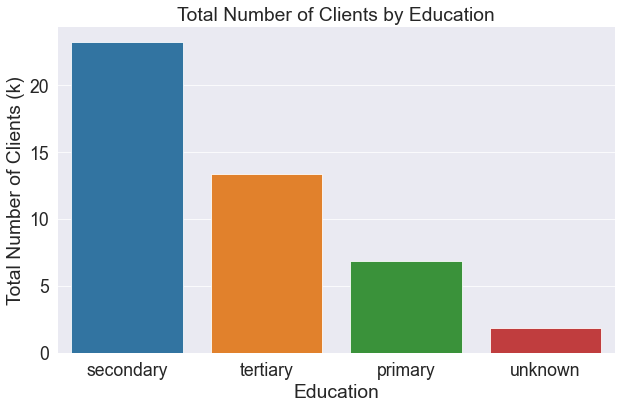

In [9]:
x, y = 'education', 'row_id'

df_job = df[[x, y]].groupby(
    by=[x], 
    as_index=False
).count().sort_values(
    by=[y],
    ascending=False
)

df_job[y] = df_job[y] / 1000

plt.figure(figsize=(10, 6))
sns.barplot(
    x=x,
    y=y, 
    data=df_job
).set(
    title='Total Number of Clients by Education', 
    xlabel='Education', 
    ylabel='Total Number of Clients (k)');

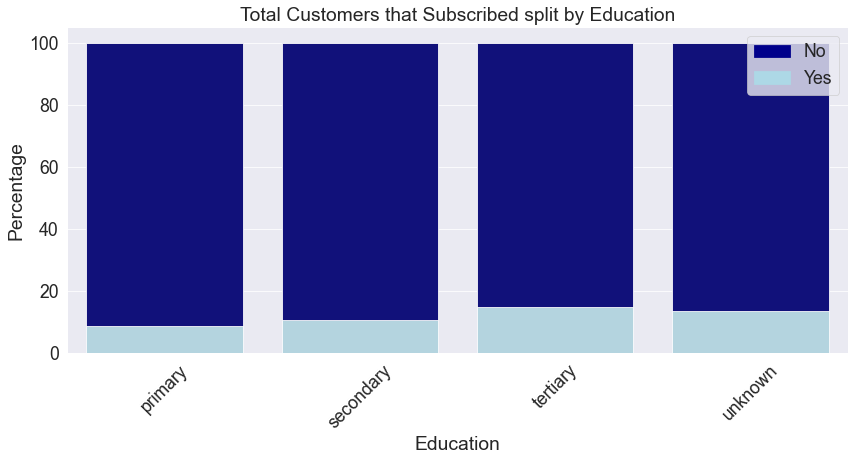

In [10]:
x, y = 'education', 'row_id'

total = df.groupby(x)[y].count().reset_index()
part = df[df.y=='yes'].groupby(x)[y].count().reset_index()

part.row_id = [i / j * 100 for i, j in zip(part.row_id, total.row_id)]
total.row_id = [i / j * 100 for i, j in zip(total.row_id, total.row_id)]

plt.figure(figsize=(14, 6))

bar_total = sns.barplot(x=x,  y=y, data=total, color='darkblue')
bar_part = sns.barplot(x=x, y=y, data=part, color='lightblue')

top_bar = mpatches.Patch(color='darkblue', label='No')
bottom_bar = mpatches.Patch(color='lightblue', label='Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.xticks(rotation=45)
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.title('Total Customers that Subscribed split by Education')

plt.show()